# Problem Statement

Dream Housing Finance company deals in all home loans. They have presence across all urban, semi-urban and rural areas. Customer first apply for home loan after that company validates the customer eligibility for loan. Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers.

It is a classification problem where we have to predict whether a loan would be approved or not. In a classification problem, we have to predict discrete values based on a given set of independent variable(s). Classification can be of two types:

- **Binary Classification** : In this classification we have to predict either of the two given classes. For example: classifying the gender as male or female, predicting the result as win or loss, etc.

- **Multiclass Classification** : Here we have to classify the data into three or more classes. For example: classifying a movie's genre as comedy, action or romantic, classify fruits as oranges, apples, or pears, etc.

Loan prediction is a very common real-life problem that each retail bank faces atleast once in its lifetime. If done correctly, it can save a lot of man hours at the end of a retail bank.
Although this course is specifically built to give you a walkthrough of Loan Prediction problem, you can always refer the content to get a comprehensive overview to solve a classification problem.

After looking at the problem statement, we will now move into hypothesis generation. It is the process of listing out all the possible factors that can affect the outcome.



# Hypothesis generation

This is a very important stage in any data science/machine learning pipeline. It involves understanding the problem in detail by brainstorming as many factors as possible which can impact the outcome. It is done by understanding the problem statement thoroughly and before looking at the data.

Below are some of the factors which we think can affect the Loan Approval (dependent variable for this loan prediction problem):

- **Salary**: Applicants with high income should have more chances of loan approval.
- **Previous history**: Applicants who have repayed their previous debts should have higher chances of loan approval.
- **Loan amount**: Loan approval should also depend on the loan amount. If the loan amount is less, chances of loan approval should be high.
- **Loan term**: Loan for less time period and less amount should have higher chances of approval.
- **EMI**: Lesser the amount to be paid monthly to repay the loan, higher the chances of loan approval.
These are some of the factors which we think can affect the target variable, you can come up with many more factors.



## Steps to follow

1. Problem Statement
2. Hypothesis Generation
3. Getting the system ready and loading the data
4. Understanding the data
5. EDA
- Univariate Analysis
- Bivariate Analysis
6. Missing value and outlier treatment
7. Evaluation Metrics for classification problem
8. Model building: part 1
9. Logistic regression (machine learning algorithm)
10. Feature engineering
11. Model building : part 2

### Coading Time !

#### Loading Packages

In [2]:
import pandas as pd
import numpy as np          # For mathematical calculations
import seaborn as sns       # For data Visualization
import matplotlib.pyplot as plt   # For plotting graphs

%matplotlib inline


#### Load the data

In [5]:
train = pd.read_csv('data/loan_sanction_train.csv')
test = pd.read_csv('data/loan_sanction_test.csv')

In [7]:
train.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [9]:
train.tail(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
604,LP002959,Female,Yes,1,Graduate,No,12000,0.0,496.0,360.0,1.0,Semiurban,Y
605,LP002960,Male,Yes,0,Not Graduate,No,2400,3800.0,NaN,180.0,1.0,Urban,N
606,LP002961,Male,Yes,1,Graduate,No,3400,2500.0,173.0,360.0,1.0,Semiurban,Y
607,LP002964,Male,Yes,2,Not Graduate,No,3987,1411.0,157.0,360.0,1.0,Rural,Y
608,LP002974,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,Y
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [10]:
train_original = train.copy()
test_original = test.copy()

In [11]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [12]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [13]:
# print data types of each variable
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [14]:
# shape of dataset - no of rows and columns
train.shape

(614, 13)

In [15]:
test.shape

(367, 12)

## Target variable

In [18]:
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [20]:
# Normalize can be set to true to print proportions insted of number
train['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

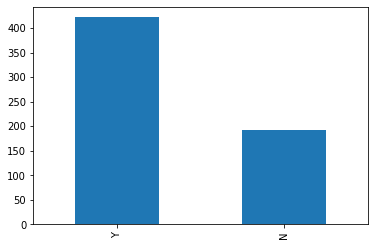

In [19]:
train['Loan_Status'].value_counts().plot.bar()

Categorical Features : 
Ordinal Features :
Numerical features :

# Independent variable (Categorical)

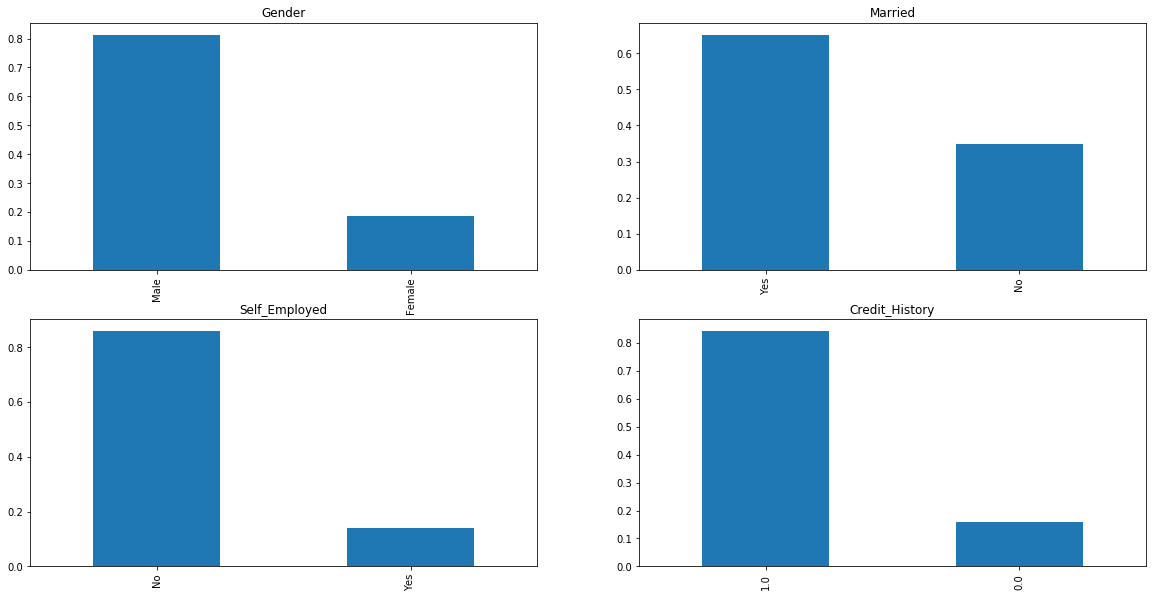

In [23]:
plt.figure(1)
plt.subplot(221)
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10),title='Gender')

plt.subplot(222)
train['Married'].value_counts(normalize=True).plot.bar(figsize=(20,10),title='Married')

plt.subplot(223)
train['Self_Employed'].value_counts(normalize=True).plot.bar(figsize=(20,10),title='Self_Employed')

plt.subplot(224)
train['Credit_History'].value_counts(normalize=True).plot.bar(figsize=(20,10),title='Credit_History')

plt.show()

### Independent variable (Ordinal)

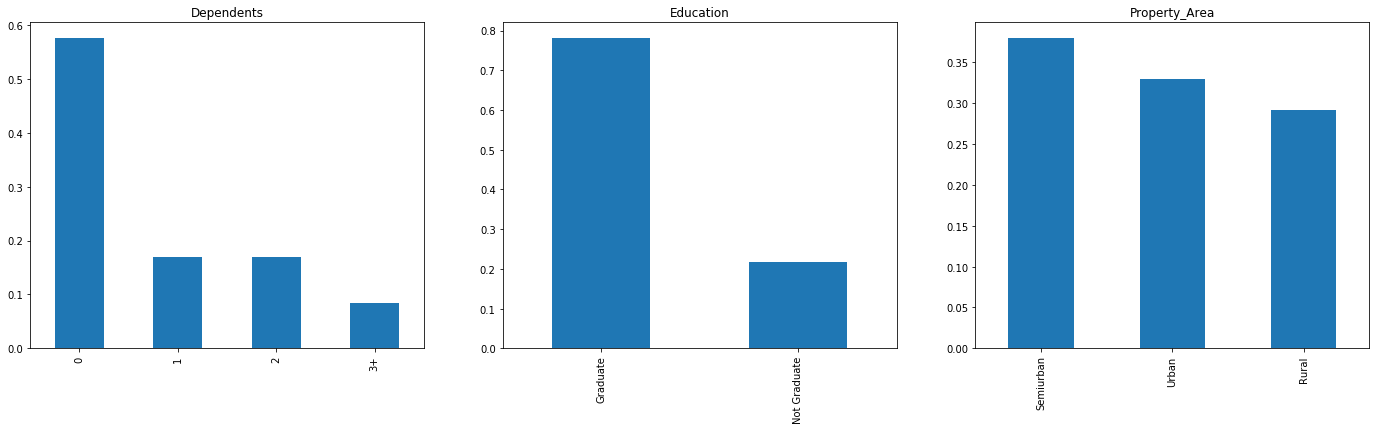

In [24]:
plt.figure(1)
plt.subplot(131)
train['Dependents'].value_counts(normalize=True).plot.bar(figsize=(24,6),title='Dependents')

plt.subplot(132)
train['Education'].value_counts(normalize=True).plot.bar(figsize=(24,6),title='Education')

plt.subplot(133)
train['Property_Area'].value_counts(normalize=True).plot.bar(figsize=(24,6),title='Property_Area')

plt.show()

# Independent Variable (Numerical)

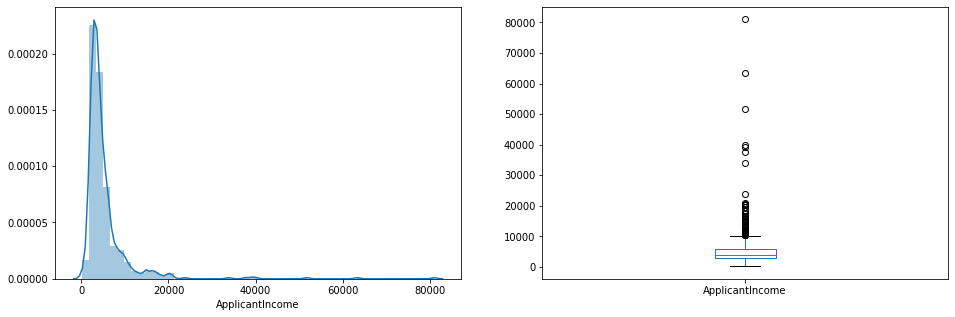

In [27]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train['ApplicantIncome']);

plt.subplot(122)
train['ApplicantIncome'].plot.box(figsize=(16,5))
plt.show()


Text(0.5, 0.98, '')

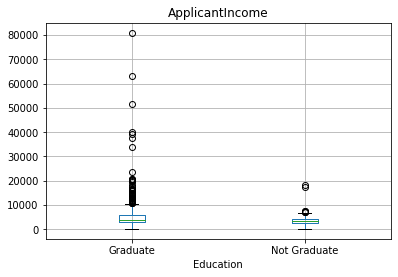

In [28]:
train.boxplot(column='ApplicantIncome', by ='Education')
plt.suptitle("")

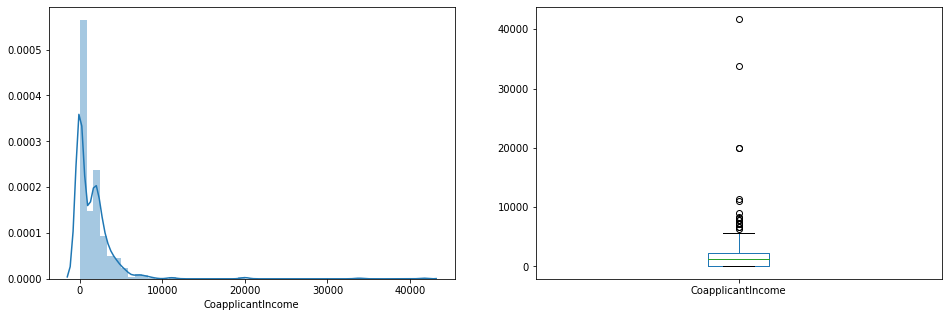

In [29]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train['CoapplicantIncome']);

plt.subplot(122)
train['CoapplicantIncome'].plot.box(figsize=(16,5))
plt.show()

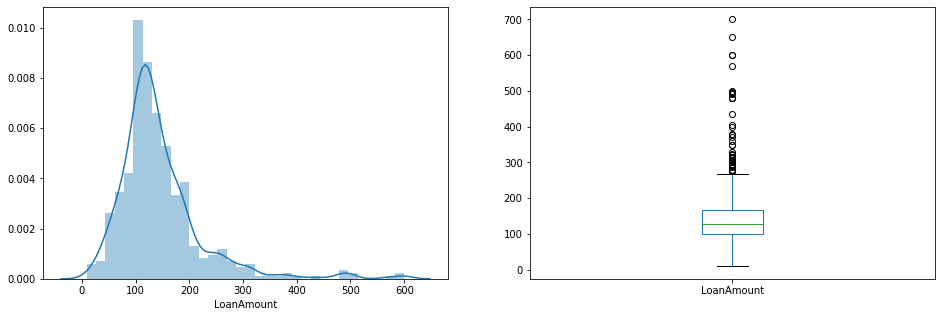

In [31]:
plt.figure(1)
plt.subplot(121)
df = train.dropna() # to remove the NaN values 
sns.distplot(df['LoanAmount'])

plt.subplot(122)
train['LoanAmount'].plot.box(figsize=(16,5))

plt.show()